In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.constants import epsilon_0,c,e,h,k
from math import pi
um = 1e6
pF = 1e-12
MHz = 1e6
nH = 1e-9


In [2]:
# l = 17508e-6
# d = 4224e-6
# # D = 8754e-6
# x1 = (l-2*d-D)/2

l = 71092e-6
d = 11000e-6
x1 = (l-5*d)/2

er = 13.4
Z0 = 38
eps = epsilon_0*er
n = np.sqrt(er)
nu = np.r_[200:1000:1000j]*MHz
beta = 2*pi*nu*n/c

In [3]:
def inputZ(Zload, length):
    num = Zload + 1j*Z0*np.tan(beta*length)
    denom = Z0 + 1j*Zload*np.tan(beta*length)
    return Z0*num/denom

In [29]:
# C = 0.87*pF #Loading from the GP cutout for Antenna Coupled
C = 0.153*pF #Loading from the GP cutout for the Dark Resonators

In [30]:
Z1 = 1./(1./inputZ(Z0, x1) + 1j*2*pi*nu*C)
Z2 = 1./(1./inputZ(Z1, d) + 1j*2*pi*nu*C)
Z3 = 1./(1./inputZ(Z2, d) + 1j*2*pi*nu*C)
Z4 = 1./(1./inputZ(Z3, d) + 1j*2*pi*nu*C)
Z5 = 1./(1./inputZ(Z4, d) + 1j*2*pi*nu*C)
Z6 = 1./(1./inputZ(Z5, d) + 1j*2*pi*nu*C)
Ztot = inputZ(Z6, x1)

In [31]:
S11 = (2*Ztot)/(Z0 + Ztot)
Zeff = Z0*(Z0 - 1j*Ztot*np.tan(beta*l))/(Ztot - 1j*Z0*np.tan(beta*l))

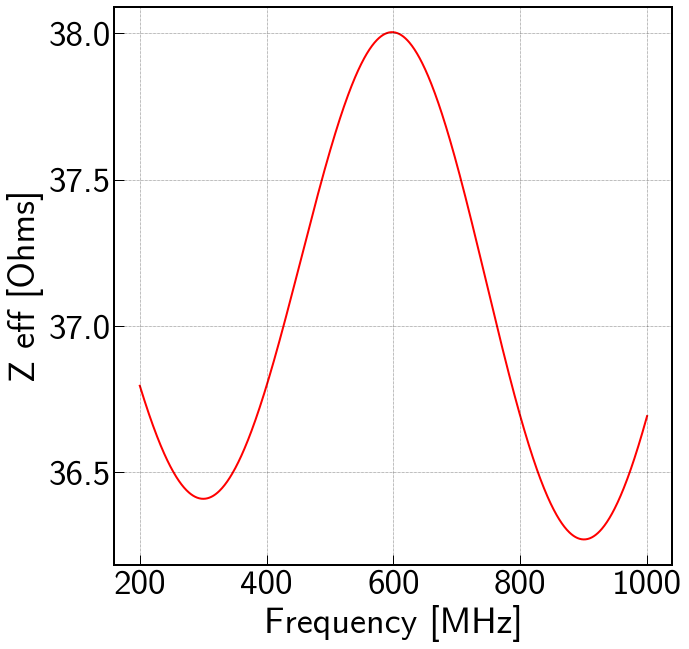

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(nu/MHz, np.real(Zeff), 'r')
# ax.plot(nu/MHz, np.imag(Zeff), 'b')
ax.grid()
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Z eff [Ohms]');